In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from shapely.geometry import Point, Polygon
import geopandas as gpd

#### ZHVI

In [2]:
zhvi = pd.read_csv('../data/zillow/zip_maricopa_zhvi.csv')

#### ZORI

In [3]:
zori = pd.read_csv('../data/zillow/zip_maricopa_zori.csv')

## Map Rent Change and Rent

In [4]:
# allow max rows and colums to be displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
geo = gpd.read_file('../data/geo/shapefiles/Phoenix_ZCTA_2.geojson')
geo['joinid'] = geo['GEOID20'].astype(int)
#geo.head(2)

In [5]:
phx = gpd.read_file('../data/geo/shapefiles/phx.geojson')
villages = gpd.read_file('../data/geo/shapefiles/Villages.shp')
villages = villages.to_crs(4269)
road = gpd.read_file('../data/geo/shapefiles/maricopa_primroads.geojson')
road = road.to_crs(4269)
mask = gpd.read_file('../data/geo/shapefiles/Mask_Zips.geojson')

In [9]:
zori['Feb20Feb23'] = zori['2/28/23']-zori['2/29/20']
zori.rename(columns={'RegionName':'zip'},inplace=True)
zori['Feb20Feb23_p'] = zori['Feb20Feb23'] / zori['2/29/20']

In [10]:
zori_map = zori[['zip','2/29/20','2/28/23','Feb20Feb23','Feb20Feb23_p']]

In [11]:
zori_map.describe()

,zip,2/29/20,2/28/23,Feb20Feb23,Feb20Feb23_p
count,114.000000,90.000000,108.000000,90.000000,90.000000
mean,85201.403509,1385.272205,1982.007313,538.372748,0.390463
std,133.873320,231.131414,474.305476,109.120277,0.056752
min,85003.000000,906.572630,1334.629327,335.275265,0.241180
25%,85042.250000,1263.987920,1685.288911,456.405022,0.356103
50%,85233.500000,1360.932892,1897.013363,519.950222,0.390243
75%,85305.750000,1507.154465,2131.525647,596.751263,0.426316
max,85396.000000,1978.672684,4779.085230,825.143827,0.560143


In [12]:
zori_geo = pd.merge(geo,zori_map,how='left',left_on='joinid',right_on='zip')

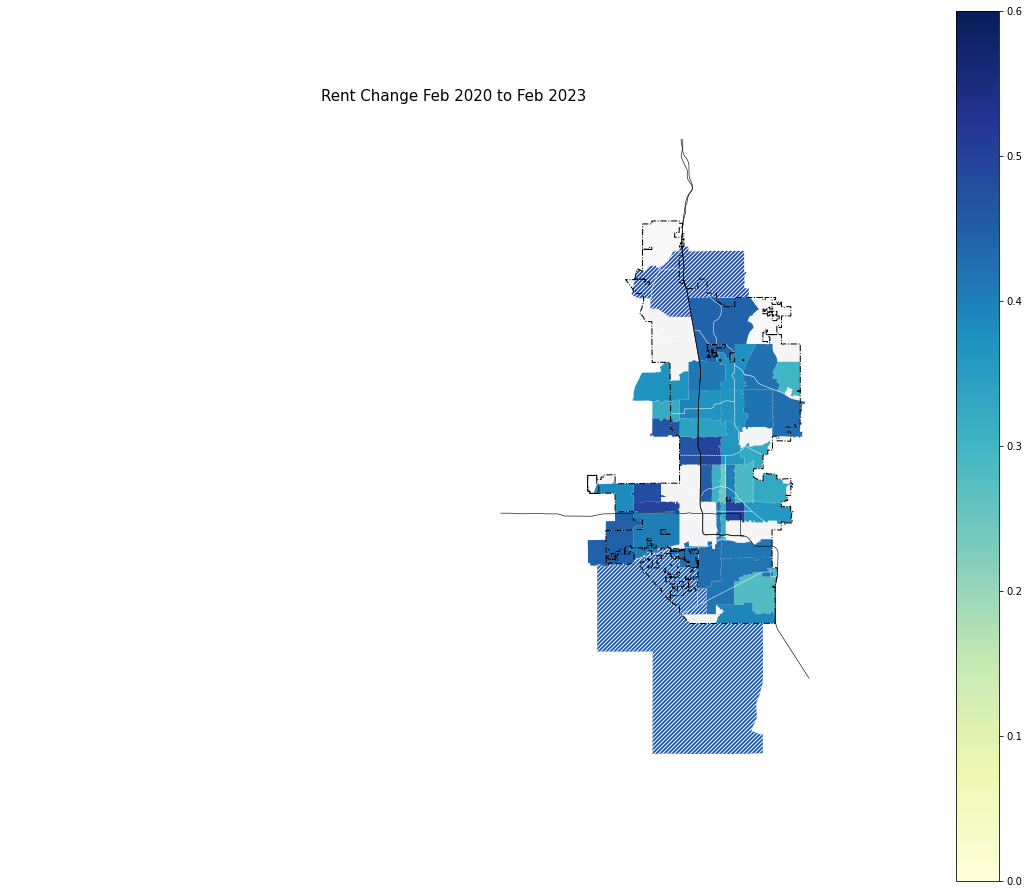

In [17]:
fig, ax = plt.subplots(1, figsize = (20,16))
ax.axis('off')
new_norm = plt.Normalize(vmin=0.0,vmax=0.6)
sm = plt.cm.ScalarMappable(cmap='YlGnBu', norm=new_norm)
sm.set_array([])
phx.plot(ax=ax,color='whitesmoke',edgecolor='black',linewidth=0)
zori_geo.plot(column = 'Feb20Feb23_p', cmap='YlGnBu', norm=new_norm, edgecolor="white", linewidth=0.0, ax=ax)
mask.plot(ax=ax,color='none',edgecolor='white',linewidth=0.1,hatch='//////')
villages.plot(ax=ax,color='none',edgecolor='white',linewidth=0.4,linestyle='dashed')
phx.plot(ax=ax,color='none',edgecolor='black',linewidth=1.0,linestyle='dashdot')
road.plot(ax=ax,color='black',edgecolor='black',linewidth=0.6)
fig.colorbar(sm)
ax.set_title(f'Rent Change Feb 2020 to Feb 2023', color = 'k',  fontsize = 15)
plt.savefig('../viz/img/zillow_rentch_Feb2023.jpg', dpi = 300)

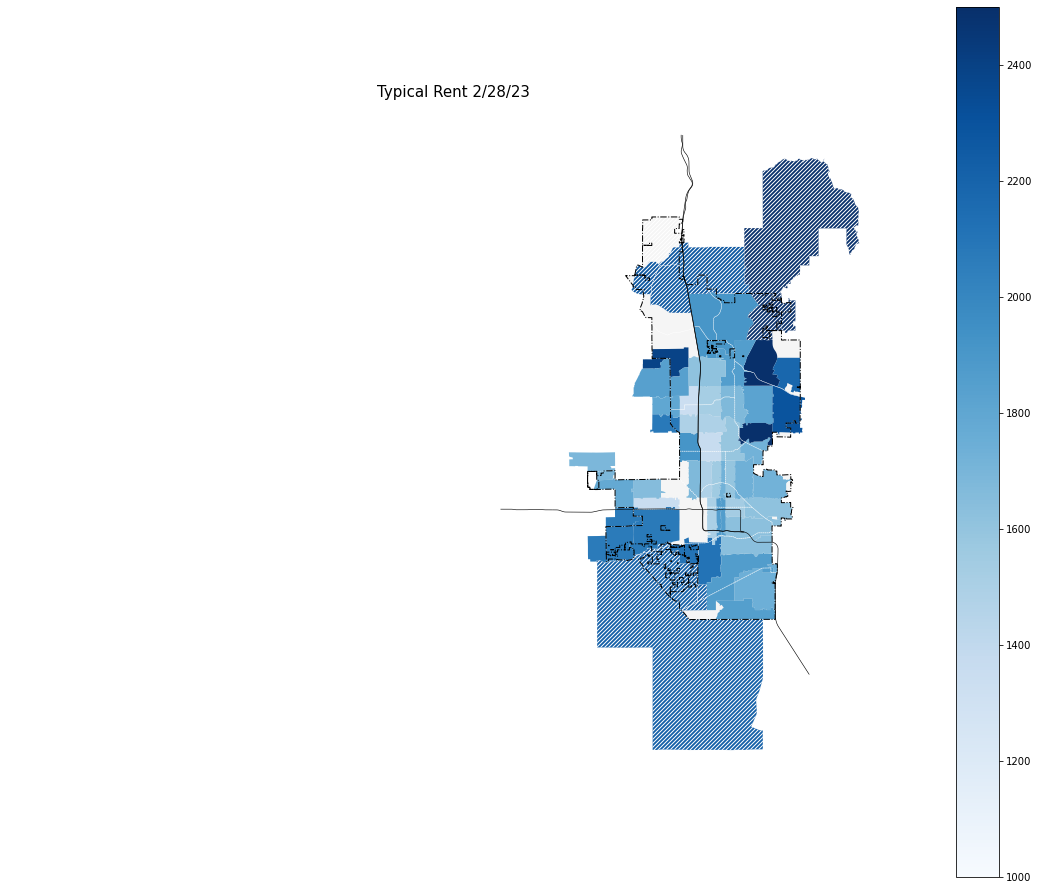

In [20]:
fig, ax = plt.subplots(1, figsize = (20,16))
ax.axis('off')
new_norm = plt.Normalize(vmin=1000,vmax=2500)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=new_norm)
sm.set_array([])
phx.plot(ax=ax,color='whitesmoke',edgecolor='black',linewidth=0)
zori_geo.plot(column = '2/28/23', cmap='Blues', norm=new_norm, edgecolor="white", linewidth=0.0, ax=ax)
mask.plot(ax=ax,color='none',edgecolor='white',linewidth=0.1,hatch='//////')
villages.plot(ax=ax,color='none',edgecolor='white',linewidth=0.4,linestyle='dashed')
phx.plot(ax=ax,color='none',edgecolor='black',linewidth=1.0,linestyle='dashdot')
road.plot(ax=ax,color='black',edgecolor='black',linewidth=0.6)
fig.colorbar(sm)
ax.set_title(f'Typical Rent 2/28/23', color = 'k',  fontsize = 15)
plt.savefig('../viz/img/zillow_rent_Feb23.jpg', dpi = 300)

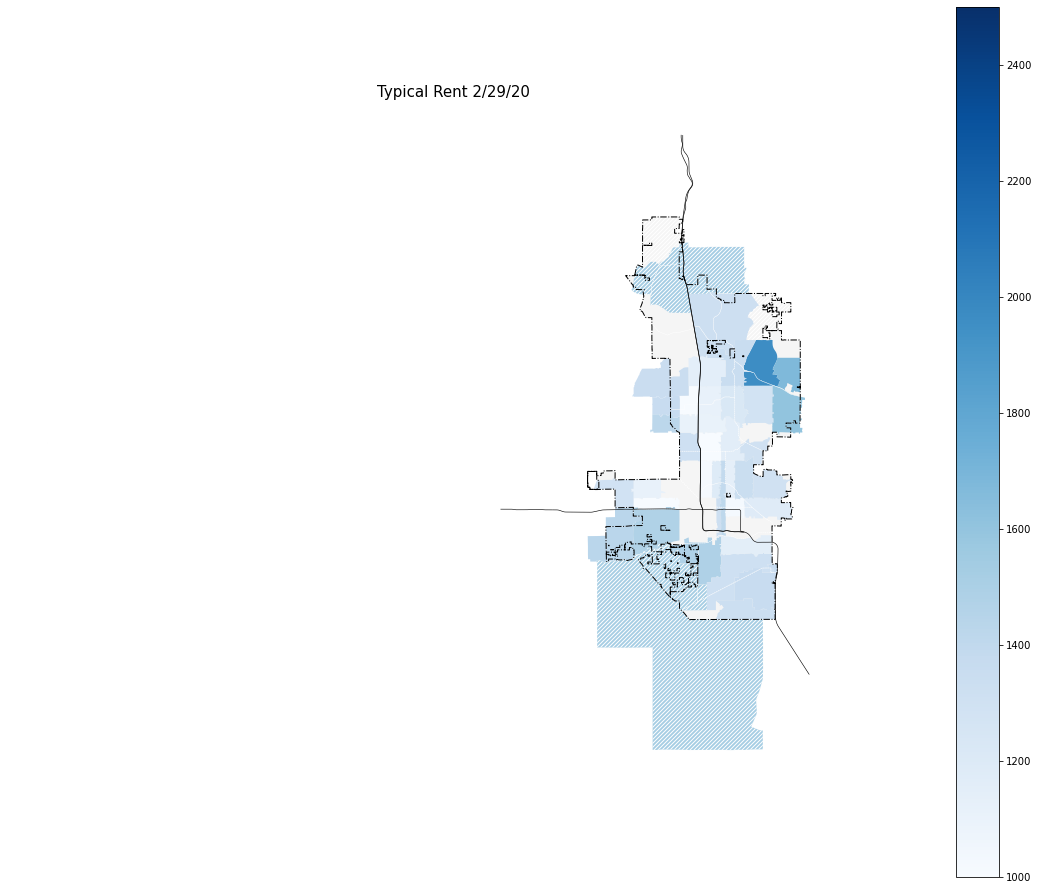

In [21]:
fig, ax = plt.subplots(1, figsize = (20,16))
ax.axis('off')
new_norm = plt.Normalize(vmin=1000,vmax=2500)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=new_norm)
sm.set_array([])
phx.plot(ax=ax,color='whitesmoke',edgecolor='black',linewidth=0)
zori_geo.plot(column = '2/29/20', cmap='Blues', norm=new_norm, edgecolor="white", linewidth=0.0, ax=ax)
mask.plot(ax=ax,color='none',edgecolor='white',linewidth=0.1,hatch='//////')
villages.plot(ax=ax,color='none',edgecolor='white',linewidth=0.4,linestyle='dashed')
phx.plot(ax=ax,color='none',edgecolor='black',linewidth=1.0,linestyle='dashdot')
road.plot(ax=ax,color='black',edgecolor='black',linewidth=0.6)
fig.colorbar(sm)
ax.set_title(f'Typical Rent 2/29/20', color = 'k',  fontsize = 15)
plt.savefig('../viz/img/zillow_rent_Feb20.jpg', dpi = 300)

## Map Change in Cost & Cost

In [22]:
zhvi.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/00,2/29/00,3/31/00,4/30/00,5/31/00,6/30/00,7/31/00,8/31/00,9/30/00,10/31/00,11/30/00,12/31/00,1/31/01,2/28/01,3/31/01,4/30/01,5/31/01,6/30/01,7/31/01,8/31/01,9/30/01,10/31/01,11/30/01,12/31/01,1/31/02,2/28/02,3/31/02,4/30/02,5/31/02,6/30/02,7/31/02,8/31/02,9/30/02,10/31/02,11/30/02,12/31/02,1/31/03,2/28/03,3/31/03,4/30/03,5/31/03,6/30/03,7/31/03,8/31/03,9/30/03,10/31/03,11/30/03,12/31/03,1/31/04,2/29/04,3/31/04,4/30/04,5/31/04,6/30/04,7/31/04,8/31/04,9/30/04,10/31/04,11/30/04,12/31/04,1/31/05,2/28/05,3/31/05,4/30/05,5/31/05,6/30/05,7/31/05,8/31/05,9/30/05,10/31/05,11/30/05,12/31/05,1/31/06,2/28/06,3/31/06,4/30/06,5/31/06,6/30/06,7/31/06,8/31/06,9/30/06,10/31/06,11/30/06,12/31/06,1/31/07,2/28/07,3/31/07,4/30/07,5/31/07,6/30/07,7/31/07,8/31/07,9/30/07,10/31/07,11/30/07,12/31/07,1/31/08,2/29/08,3/31/08,4/30/08,5/31/08,6/30/08,7/31/08,8/31/08,9/30/08,10/31/08,11/30/08,12/31/08,1/31/09,2/28/09,3/31/09,4/30/09,5/31/09,6/30/09,7/31/09,8/31/09,9/30/09,10/31/09,11/30/09,12/31/09,1/31/10,2/28/10,3/31/10,4/30/10,5/31/10,6/30/10,7/31/10,8/31/10,9/30/10,10/31/10,11/30/10,12/31/10,1/31/11,2/28/11,3/31/11,4/30/11,5/31/11,6/30/11,7/31/11,8/31/11,9/30/11,10/31/11,11/30/11,12/31/11,1/31/12,2/29/12,3/31/12,4/30/12,5/31/12,6/30/12,7/31/12,8/31/12,9/30/12,10/31/12,11/30/12,12/31/12,1/31/13,2/28/13,3/31/13,4/30/13,5/31/13,6/30/13,7/31/13,8/31/13,9/30/13,10/31/13,11/30/13,12/31/13,1/31/14,2/28/14,3/31/14,4/30/14,5/31/14,6/30/14,7/31/14,8/31/14,9/30/14,10/31/14,11/30/14,12/31/14,1/31/15,2/28/15,3/31/15,4/30/15,5/31/15,6/30/15,7/31/15,8/31/15,9/30/15,10/31/15,11/30/15,12/31/15,1/31/16,2/29/16,3/31/16,4/30/16,5/31/16,6/30/16,7/31/16,8/31/16,9/30/16,10/31/16,11/30/16,12/31/16,1/31/17,2/28/17,3/31/17,4/30/17,5/31/17,6/30/17,7/31/17,8/31/17,9/30/17,10/31/17,11/30/17,12/31/17,1/31/18,2/28/18,3/31/18,4/30/18,5/31/18,6/30/18,7/31/18,8/31/18,9/30/18,10/31/18,11/30/18,12/31/18,1/31/19,2/28/19,3/31/19,4/30/19,5/31/19,6/30/19,7/31/19,8/31/19,9/30/19,10/31/19,11/30/19,12/31/19,1/31/20,2/29/20,3/31/20,4/30/20,5/31/20,6/30/20,7/31/20,8/31/20,9/30/20,10/31/20,11/30/20,12/31/20,1/31/21,2/28/21,3/31/21,4/30/21,5/31/21,6/30/21,7/31/21,8/31/21,9/30/21,10/31/21,11/30/21,12/31/21,1/31/22,2/28/22,3/31/22,4/30/22,5/31/22,6/30/22,7/31/22,8/31/22,9/30/22,10/31/22,11/30/22,12/31/22,1/31/23,2/28/23,3/31/23,4/30/23
0,417444,89,85142,zip,AZ,AZ,Queen Creek,"Phoenix-Mesa-Chandler, AZ",Maricopa County,164423.4391,164448.0471,164496.7185,164728.1990,165653.2683,166910.6280,168456.6804,169646.9954,170365.5842,170975.5846,171733.1657,173117.5362,174571.0715,175955.4115,177481.9693,179304.3029,180966.9139,181986.8113,182455.6188,182862.4510,183328.1259,183638.2256,183740.9514,183948.0147,184484.5355,185216.5357,185982.4525,186510.7406,187170.5488,187788.1410,188265.2842,189109.4833,190131.7755,191567.8173,192680.0922,193893.7635,194856.9660,195663.2344,196273.1409,197319.7656,198280.1085,199648.7784,201147.8391,203227.3598,205349.9626,207351.9261,209192.6622,210955.2579,212538.3064,214010.9835,215443.1030,217050.6927,219041.7143,220893.0514,223174.9399,225767.8332,228576.3969,232043.2213,236016.8235,241397.7185,247234.1607,254167.4736,261061.6662,268902.9118,278127.3451,289384.1467,301901.1726,314498.5005,327710.7461,339398.0745,350330.2059,358612.6245,364163.5028,368513.3731,373055.9060,378529.9967,383410.8831,386216.9924,386802.7830,385496.7159,382732.6601,380972.9598,378215.8975,375643.7508,372958.0132,371015.2273,369414.9874,366980.1951,364170.4629,360572.1537,356619.3496,351927.3946,346641.5668,341914.1918,336465.1495,331175.1567,325842.4787,320141.4203,313717.2738,305567.9143,297361.5789,288781.2449,279385.7365,268529.6604,257752.7401,247319.2295,236920.4779,227137.0030,218936.6692,213454.8953,208964.0101,205000.0778,201029.8492,197614.0885,195191.6489,193074.0743,191087.4799,188484.3138,187825.2996,188094.7309,189076.4113,189114.3230,188385.3371,187556.1725,185931.6505,184340.6184,182081.6058,1807

In [23]:
zhvi['Feb20Feb23'] = zhvi['2/28/23']-zhvi['2/29/20']
zhvi.rename(columns={'RegionName':'zip'},inplace=True)
zhvi['Feb20Feb23_p'] = zhvi['Feb20Feb23'] / zhvi['2/29/20']

In [24]:
zhvi = zhvi[['zip','2/29/20','2/28/23','Feb20Feb23','Feb20Feb23_p']]

In [25]:
zhvi.describe()

,zip,2/29/20,2/28/23,Feb20Feb23,Feb20Feb23_p
count,129.000000,1.250000e+02,1.260000e+02,1.250000e+02,125.000000
mean,85207.271318,3.479452e+05,5.017657e+05,1.536749e+05,0.433699
std,134.467047,1.541400e+05,2.534408e+05,1.040207e+05,0.067868
min,85003.000000,9.292221e+04,1.564246e+05,6.350239e+04,0.310933
25%,85044.000000,2.621711e+05,3.724491e+05,1.105293e+05,0.389328
50%,85250.000000,3.180136e+05,4.380014e+05,1.264634e+05,0.419531
75%,85320.000000,3.899508e+05,5.479378e+05,1.589322e+05,0.465374
max,85396.000000,1.415994e+06,2.468367e+06,1.052373e+06,0.743205


In [26]:
zhvi_map = pd.merge(geo,zhvi,how='left',left_on='joinid',right_on='zip')

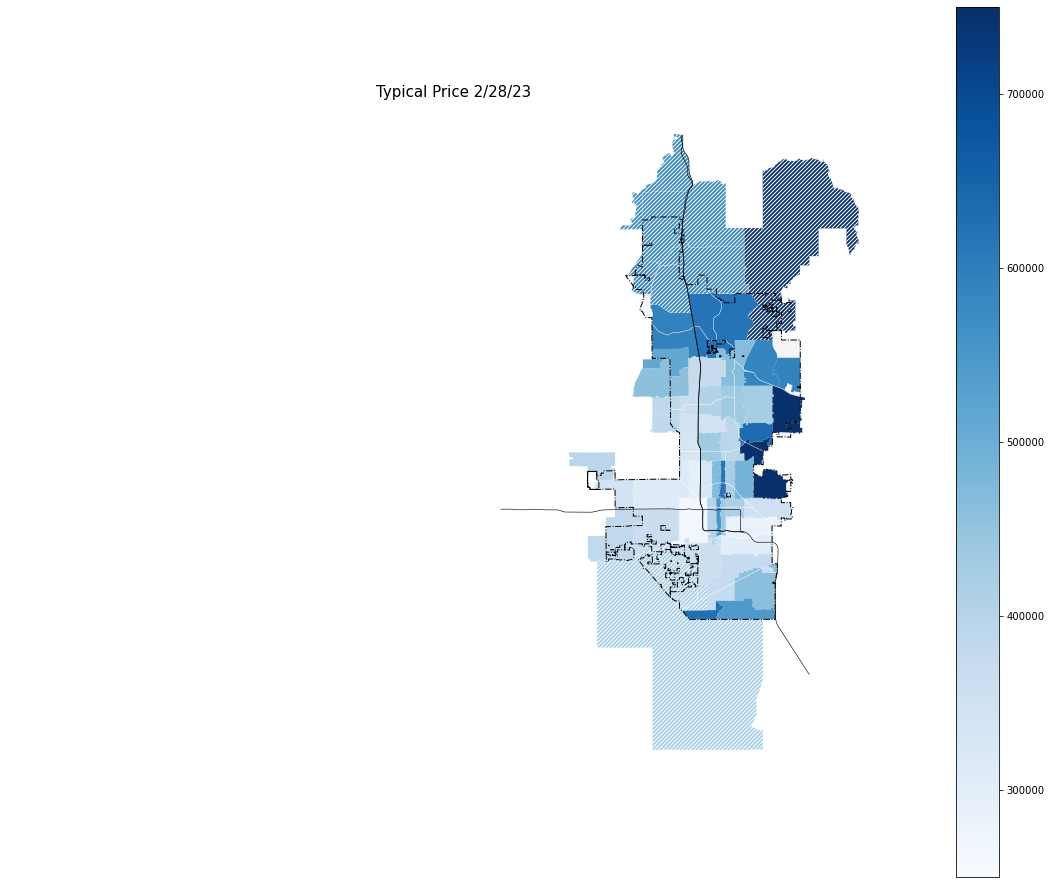

In [28]:
fig, ax = plt.subplots(1, figsize = (20,16))
ax.axis('off')
new_norm = plt.Normalize(vmin=250000,vmax=750000)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=new_norm)
sm.set_array([])
phx.plot(ax=ax,color='whitesmoke',edgecolor='black',linewidth=0)
zhvi_map.plot(column = '2/28/23', cmap='Blues', norm=new_norm, edgecolor="white", linewidth=0.0, ax=ax)
mask.plot(ax=ax,color='none',edgecolor='white',linewidth=0.1,hatch='//////')
villages.plot(ax=ax,color='none',edgecolor='white',linewidth=0.4,linestyle='dashed')
phx.plot(ax=ax,color='none',edgecolor='black',linewidth=1.0,linestyle='dashdot')
road.plot(ax=ax,color='black',edgecolor='black',linewidth=0.6)
fig.colorbar(sm)
ax.set_title(f'Typical Price 2/28/23', color = 'k',  fontsize = 15)
plt.savefig('../viz/img/zillow_sale_Feb23.jpg', dpi = 300)

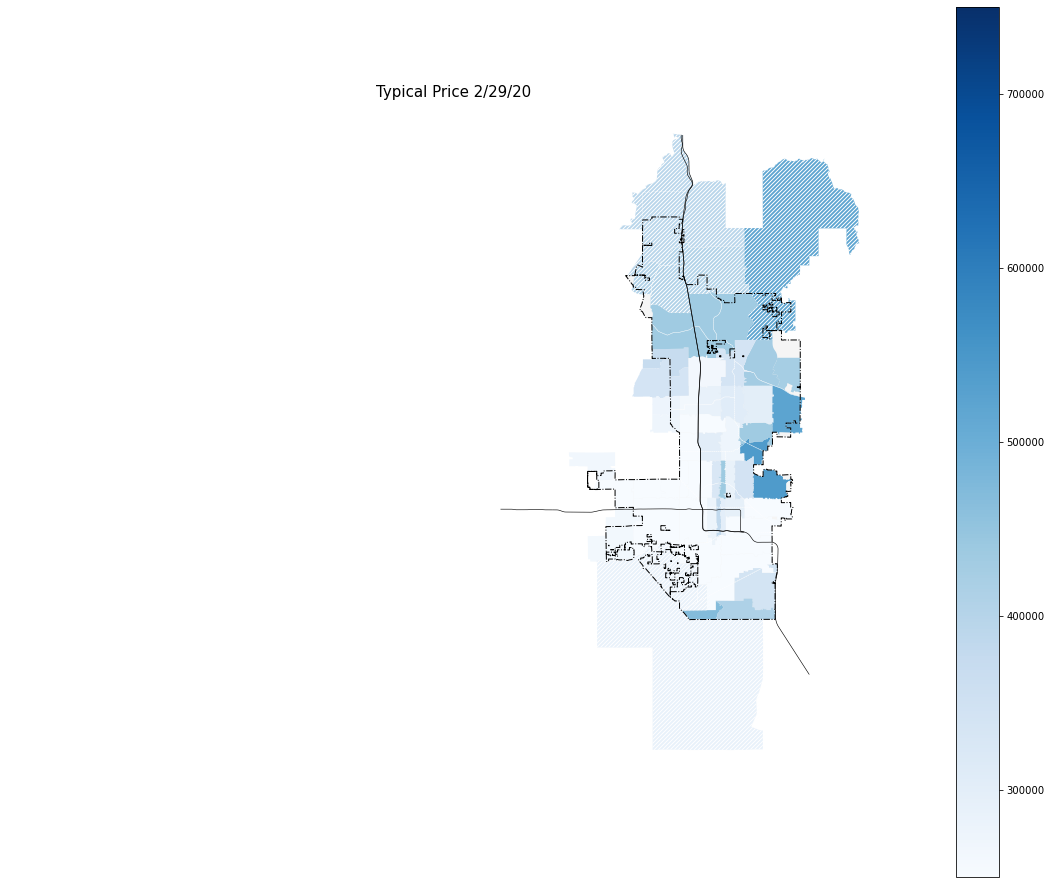

In [29]:
fig, ax = plt.subplots(1, figsize = (20,16))
ax.axis('off')
new_norm = plt.Normalize(vmin=250000,vmax=750000)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=new_norm)
sm.set_array([])
phx.plot(ax=ax,color='whitesmoke',edgecolor='black',linewidth=0)
zhvi_map.plot(column = '2/29/20', cmap='Blues', norm=new_norm, edgecolor="white", linewidth=0.0, ax=ax)
mask.plot(ax=ax,color='none',edgecolor='white',linewidth=0.1,hatch='//////')
villages.plot(ax=ax,color='none',edgecolor='white',linewidth=0.4,linestyle='dashed')
phx.plot(ax=ax,color='none',edgecolor='black',linewidth=1.0,linestyle='dashdot')
road.plot(ax=ax,color='black',edgecolor='black',linewidth=0.6)
fig.colorbar(sm)
ax.set_title(f'Typical Price 2/29/20', color = 'k',  fontsize = 15)
plt.savefig('../viz/img/zillow_sale_Feb20.jpg', dpi = 300)

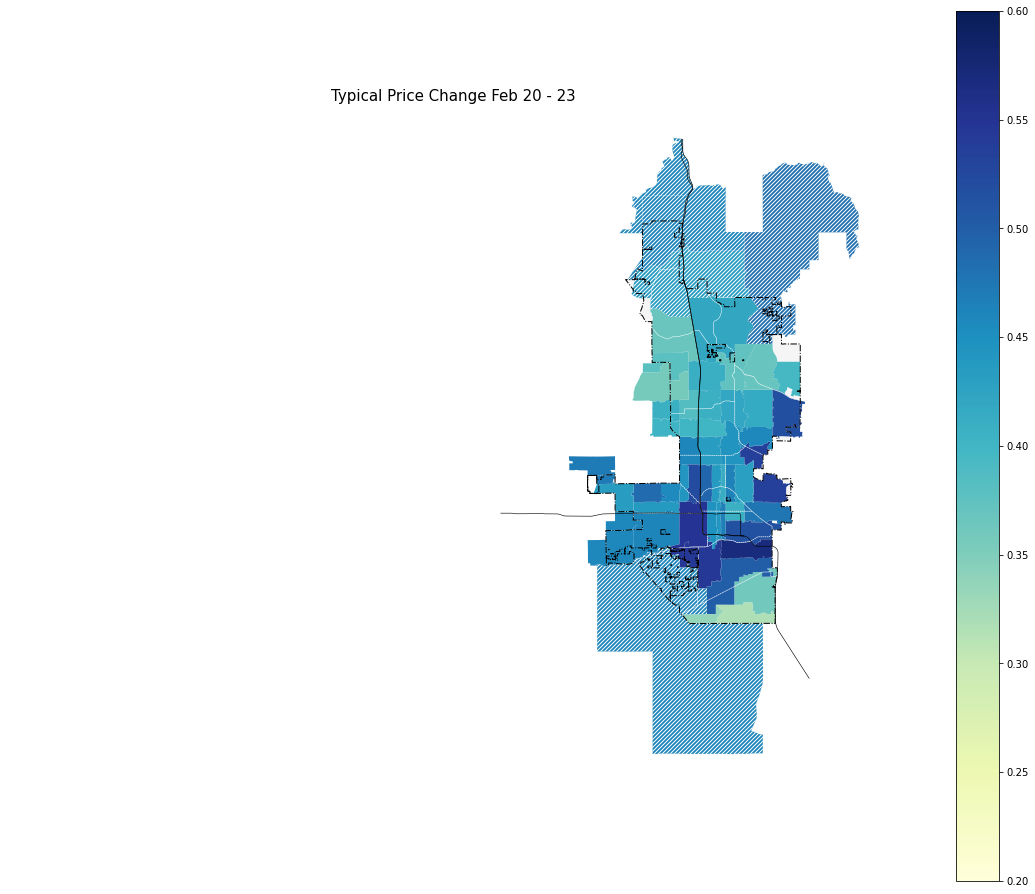

In [32]:
fig, ax = plt.subplots(1, figsize = (20,16))
ax.axis('off')
new_norm = plt.Normalize(vmin=0.2,vmax=0.6)
sm = plt.cm.ScalarMappable(cmap='YlGnBu', norm=new_norm)
sm.set_array([])
phx.plot(ax=ax,color='whitesmoke',edgecolor='black',linewidth=0)
zhvi_map.plot(column ='Feb20Feb23_p', cmap='YlGnBu', norm=new_norm, edgecolor="white", linewidth=0.0, ax=ax)
mask.plot(ax=ax,color='none',edgecolor='white',linewidth=0.1,hatch='//////')
villages.plot(ax=ax,color='none',edgecolor='white',linewidth=0.4,linestyle='dashed')
phx.plot(ax=ax,color='none',edgecolor='black',linewidth=1.0,linestyle='dashdot')
road.plot(ax=ax,color='black',edgecolor='black',linewidth=0.6)
fig.colorbar(sm)
ax.set_title(f'Typical Price Change Feb 20 - 23', color = 'k',  fontsize = 15)
plt.savefig('../viz/img/zillow_salech_Feb2023.jpg', dpi = 300)